# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
# Create lists to append information pulled 
cities_found = []
lat = []
long = []
temp = []
humidity = []
cloud = []
speed = []

# Set url to include API key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Set counters to be used for the print statements
counter = 0
set_count = 1

print("Beginning Data Retrieval")
print("-----------------------------")

# Perform queries for elements in the cities list, and append them to others lists to be used in dataframe
for city in cities:
    
    try:
        response = requests.get(f"{url}&q={city}").json() 
        cities_found.append(response["name"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        speed.append(response["wind"]["speed"])
        
        if counter > 49:      # When the counter prints 50 or above
            counter = 1       # Start the counter at 1 again
            set_count += 1    # Set count is the last set count + 1 and exit the set
        else:
            counter += 1      # When the counter is less than 50, keep adding to counter
        
        print(f"Processing Record {counter} of Set {set_count} | {city}")

          
    except:
        print("City not found. Skipping...")
    continue
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | severo-kurilsk
Processing Record 3 of Set 1 | adre
Processing Record 4 of Set 1 | ust-koksa
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | nsanje
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | prado
Processing Record 12 of Set 1 | tiksi
City not found. Skipping...
Processing Record 13 of Set 1 | saint george
Processing Record 14 of Set 1 | wuwei
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | nanortalik
Processing Record 17 of Set 1 | geraldton
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | camocim
Processing Record 21 of Set 1 | kralendijk
Processing Record 22 of Set 1 | lumeje
Processing Record 23 of Set

Processing Record 36 of Set 4 | porto velho
Processing Record 37 of Set 4 | mareeba
Processing Record 38 of Set 4 | yar-sale
Processing Record 39 of Set 4 | loreto
Processing Record 40 of Set 4 | mbeya
Processing Record 41 of Set 4 | cherskiy
Processing Record 42 of Set 4 | penzance
Processing Record 43 of Set 4 | kiunga
Processing Record 44 of Set 4 | ribeira grande
Processing Record 45 of Set 4 | pesqueria
Processing Record 46 of Set 4 | santa maria
Processing Record 47 of Set 4 | ucar
Processing Record 48 of Set 4 | vardo
Processing Record 49 of Set 4 | adrar
Processing Record 50 of Set 4 | arraial do cabo
Processing Record 1 of Set 5 | saint-francois
Processing Record 2 of Set 5 | tarakan
Processing Record 3 of Set 5 | lompoc
Processing Record 4 of Set 5 | aden
Processing Record 5 of Set 5 | carutapera
Processing Record 6 of Set 5 | kruisfontein
Processing Record 7 of Set 5 | sincelejo
Processing Record 8 of Set 5 | juba
Processing Record 9 of Set 5 | pergamino
Processing Record 10

Processing Record 25 of Set 8 | diebougou
City not found. Skipping...
Processing Record 26 of Set 8 | chernyshevskiy
Processing Record 27 of Set 8 | kadoma
Processing Record 28 of Set 8 | velasco ibarra
Processing Record 29 of Set 8 | port hawkesbury
Processing Record 30 of Set 8 | naryan-mar
City not found. Skipping...
Processing Record 31 of Set 8 | sumbe
Processing Record 32 of Set 8 | chara
Processing Record 33 of Set 8 | beira
Processing Record 34 of Set 8 | zonguldak
Processing Record 35 of Set 8 | tapalpa
Processing Record 36 of Set 8 | sultanpur
Processing Record 37 of Set 8 | castro
Processing Record 38 of Set 8 | christchurch
Processing Record 39 of Set 8 | mount gambier
Processing Record 40 of Set 8 | tabu
Processing Record 41 of Set 8 | phan thiet
Processing Record 42 of Set 8 | sisimiut
City not found. Skipping...
Processing Record 43 of Set 8 | hovd
Processing Record 44 of Set 8 | hillsborough
Processing Record 45 of Set 8 | harper
Processing Record 46 of Set 8 | petrolin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
cities_df = pd.DataFrame({"City Name" : cities_found,
                "Latitude" : lat,
                "Longitude" : long,
                "Max Temp" : temp,
                "Humidity" : humidity,
                "Cloudiness" : cloud,
                "Wind Speend" : speed})
cities_df.head()

,City Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speend
0,Punta Arenas,-53.16,-70.91,41.00,76,0,20.80
1,Severo-Kurilsk,50.68,156.12,45.35,91,100,20.09
2,Adre,13.47,22.20,86.79,41,38,1.25
3,Ust-Koksa,50.27,85.62,43.82,29,0,2.93
4,Rikitea,-23.12,-134.97,67.80,74,36,15.52


In [26]:
cities_df.to_csv(output_data_file, index = False, header = True)

In [27]:
cities_df.count()

City Name      543
Latitude       543
Longitude      543
Temperature    543
Humidity       543
Cloudiness     543
Wind Speend    543
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [43]:
# Find the maximum value of latitudes and round up to the nearest integer
x_limit = cities_df["Latitude"].apply(np.ceil).max()

# Comparing the two results
print(cities_df["Latitude"].max())
print(x_limit)

78.22
79.0


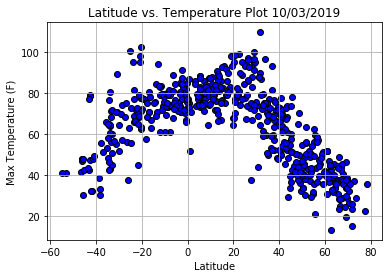

In [55]:
# Set x-axis to start at zero, end at the x_limit, with increments of 1
x_axis = np.arange(0, x_limit, 1)

# Set variable for current date to print to title
current_date = pd.Timestamp("today").strftime("%m/%d/%Y")

plt.scatter(cities_df["Latitude"], cities_df["Temperature"], marker="o", facecolors="blue", edgecolors="black")
plt.grid()
plt.title("Latitude vs. Temperature Plot " + str(current_date))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Print plot to png
plt.savefig("Images/Lat_vs_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

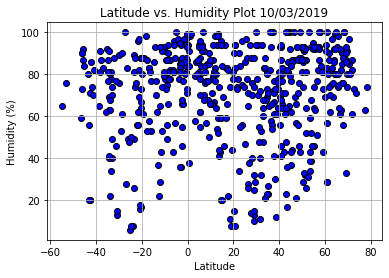

In [56]:
current_date = pd.Timestamp("today").strftime("%m/%d/%Y")

plt.scatter(cities_df["Latitude"], cities_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.grid()
plt.title("Latitude vs. Humidity Plot " + str(current_date))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.savefig("Images/Lat_vs_Humd.png")
plt.show()

#### Latitude vs. Cloudiness Plot

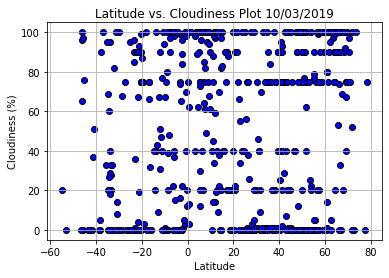

In [57]:
current_date = pd.Timestamp("today").strftime("%m/%d/%Y")

plt.scatter(cities_df["Latitude"], cities_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.grid()
plt.title("Latitude vs. Cloudiness Plot " + str(current_date))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.savefig("Images/Lat_vs_Cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

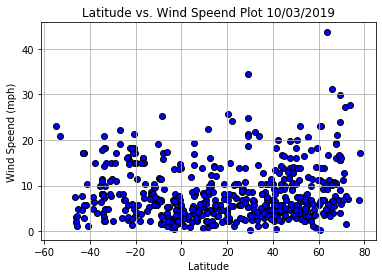

In [58]:
current_date = pd.Timestamp("today").strftime("%m/%d/%Y")

plt.scatter(cities_df["Latitude"], cities_df["Wind Speend"], marker="o", facecolors="blue", edgecolors="black")
plt.grid()
plt.title("Latitude vs. Wind Speend Plot " + str(current_date))
plt.ylabel("Wind Speend (mph)")
plt.xlabel("Latitude")

plt.savefig("Images/Lat_vs_WindSpeed.png")
plt.show()